# TP - Nettoyage textuel et analyse exploratoire

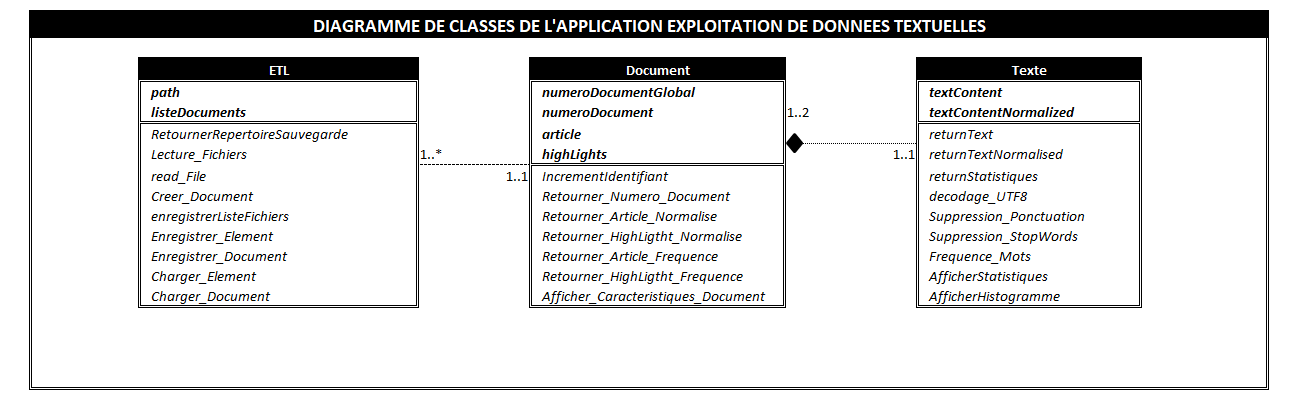

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "DiagrammeClasses.png")

# Classes du programme

## Classe ETL

In [120]:
import pickle
import os
import numpy as np 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

#from Document import Document

class ETL:

    def __init__(self,path):
        self.path = path
        os.chdir(path)
        
        self.listeDocuments = []
        
        self.FrequenceMotsHighLights = {}
        self.FrequenceMotsArticles = {}
        
        self.Matrice_TF_IDF_HighLights = {}
        self.Matrice_TF_IDF_Articles = {}
    
    def retourner_calcul_frequence_mots(self):
        for index,document in enumerate(self.listeDocuments):
            print('Document n° {} ----------------------'.format(index+1))
            print('Fréquence de mots HighLight : -------')
            print(document.Retourner_HighLigtht_Frequence())
            
            print('Fréquence de mots Article : -------')
            print(document.Retourner_Article_Frequence())
            print('-----------------------------------')
            
    def retourner_calcul_matrice_idf(self):
        for index,document in enumerate(self.listeDocuments):
            print('Document n° {} ----------------------'.format(index+1))
            print('Matrice TF-IDF HighLight : -------')
            print(document.Retourner_HighLigtht_Matrice_TF_IDF())
            
            print('Matrice TF-IDF Article : -------')
            print(document.Retourner_Article_Matrice_TF_IDF())
            print('-----------------------------------')
            
    def retourner_calcul_matrice_idf_global_Highlight(self):
        corpus = []
        
        for index,document in enumerate(self.listeDocuments):
            corpus.append(document.highLights.returnText())
            
        cvec = CountVectorizer(
                                lowercase=True,        
                                tokenizer=None,        
                                token_pattern=r'\w+')  

        term_freq = cvec.fit_transform(corpus)
        
        matrice_tfidf = TfidfTransformer().fit_transform(term_freq)
        
        return matrice_tfidf        

    def retourner_calcul_matrice_idf_global_Article(self):
        corpus = []
        
        for index,document in enumerate(self.listeDocuments):
            corpus.append(document.article.returnText())
            
        cvec = CountVectorizer(
                                lowercase=True,        
                                tokenizer=None,        
                                token_pattern=r'\w+')  

        term_freq = cvec.fit_transform(corpus)
        
        matrice_tfidf = TfidfTransformer().fit_transform(term_freq)
        
        return matrice_tfidf 
    
    def creation_Dictionnaire_HighLight_TF_IDF(self):
        for index,document in enumerate(self.listeDocuments):            
            for items in document.Retourner_HighLigtht_Matrice_TF_IDF():
                try:
                    self.Matrice_TF_IDF_HighLights[items.todok().keys()]+=1
                except:
                    try:
                        self.Matrice_TF_IDF_HighLights[items.todok().keys()]=1                       
                    except:
                        pass
        
        return self.Matrice_TF_IDF_HighLights
    
    def creation_Dictionnaire_Article_TF_IDF(self):
        for index,document in enumerate(self.listeDocuments):            
            for items in document.Retourner_Article_Matrice_TF_IDF():
                try:
                    self.Matrice_TF_IDF_Article[items.todok().keys()]+=1
                except:
                    try:
                        self.Matrice_TF_IDF_Article[items.todok().keys()]=1                       
                    except:
                        pass
        
        return self.Matrice_TF_IDF_Article
            
    def creation_Dictionnaire_HighLight_Frequence_Mots(self):
        for index,document in enumerate(self.listeDocuments):
            for items in document.Retourner_HighLigtht_Frequence():
                try:
                    self.FrequenceMotsHighLights[items[0]]+=items[1]
                except:
                    self.FrequenceMotsHighLights[items[0]]=items[1]
        
        return self.FrequenceMotsHighLights
    
    def creation_Dictionnaire_Article_Frequence_Mots(self):
        for index,document in enumerate(self.listeDocuments):
            for items in document.Retourner_Article_Frequence():
                try:
                    self.FrequenceMotsArticles[items[0]]+=items[1]
                except:
                    self.FrequenceMotsArticles[items[0]]=items[1]
        
        return self.FrequenceMotsArticles

    def retournerRepertoireSauvegarde(self):
        repertoireBackUp = self.path 
        return repertoireBackUp

    def Lecture_Fichiers(self):
        listeFichiers = os.listdir(self.path)
        
        for fichier in listeFichiers:
            self.Creer_Document(fichier)
    
    def read_File(self,nameFile):
        
        Content = {}
        
        with open(nameFile,"rb") as myFile:
            myString = str(myFile.read())
            Content['Texte'] = myString[:int(myString.find('@highlight'))]
            Content['HighLight'] = myString[int(myString.find('@highlight')):]
            
        return Content

    def Creer_Document(self,nomFichier):
        fichier = self.read_File(nomFichier)
        
        document = Document(
                        fichier['Texte'],
                        fichier['HighLight'])
        
        self.listeDocuments.append(document)

    def enregistrerListeFichiers(self):
        for document in self.listeDocuments:
            self.Enregistrer_Document(
                                document.Retourner_Numero_Document()) 

    def Enregistrer_Element(self,numeroDocument,contenu,suffixe):
        os.chdir(self.retournerRepertoireSauvegarde())
        
        nameFile = "Document_" + str(numeroDocument) + suffixe
        
        with open(nameFile,"wb") as myFichier:
            monPickler = pickle.Pickler(myFichier)
            monPickler.dump(contenu)

    def Enregistrer_Document(self,numeroDocument):       
        self.Enregistrer_Element(
                            numeroDocument,
                            self.listeDocuments[numeroDocument-1].Retourner_Article_Normalise(),
                            '_Article')
        
        self.Enregistrer_Element(
                            numeroDocument,
                            self.listeDocuments[numeroDocument-1].Retourner_HighLigtht_Normalise(),
                            '_HighLights')

    def Charger_Element(self,numeroDocument,suffixe):
        os.chdir(self.retournerRepertoireSauvegarde())
        
        nameFile = "Document_" + str(numeroDocument) + suffixe
        
        with open(nameFile,"rb") as myFichiers:
            monDe_Pickler = pickle.Unpickler(myFichiers)
            return  monDe_Pickler.load()

    def Charger_Document(self,numeroDocument):
        print('------------------------------')
        print('ARTICLE N° {} '.format(numeroDocument))
        print('------------------------------')
        print(
                self.Charger_Element(
                                    numeroDocument,
                                    '_Article'))
        
        print('------------------------------')
        print('HIGHLIGHTS N° {} '.format(numeroDocument))
        print('------------------------------')
        print(
                self.Charger_Element(
                                    numeroDocument,
                                    '_HighLights'))           
        


## Classe Document

In [79]:
#from Texte import Texte

class Document:

    numeroDocumentGlobal = 0
    
    @classmethod
    def IncrementIdentifiant(self):
        self.numeroDocumentGlobal += 1    
    
    def __init__(self, textArticle, textHighLights):
        self.IncrementIdentifiant()
        self.numeroDocument = self.numeroDocumentGlobal
        
        self.article = Texte(textArticle)        
        self.highLights = Texte(textHighLights)
        
        self.Afficher_Caracteristiques_Document()
        
    def Retourner_Numero_Document(self):
        return self.numeroDocument
   
    def Retourner_Article_Normalise(self):
        return self.article.returnTextNormalised()
        
    def Retourner_HighLigtht_Normalise(self):
        return self.highLights.returnTextNormalised()

    def Retourner_Article_Frequence(self):
        return self.article.ListeMotsTriee
        
    def Retourner_HighLigtht_Frequence(self):
        return self.highLights.ListeMotsTriee
    
    def Retourner_Article_Matrice_TF_IDF(self):
        return self.article.retourner_Matrice_TF_IDF()
        
    def Retourner_HighLigtht_Matrice_TF_IDF(self):
        return self.highLights.retourner_Matrice_TF_IDF()

    def Afficher_Caracteristiques_Document(self):
        print('--------------------------------------')
        print('Caractéristiques du document {}'.format(self.Retourner_Numero_Document()))
        print('--------------------------------------')
        print('HIGHLIGHTS du document {}'.format(self.Retourner_Numero_Document()))
        self.highLights.AfficherStatistiques()               
        print('ARTICLES du document {}'.format(self.Retourner_Numero_Document()))
        print('--------------------------------------')
        self.article.AfficherHistogramme()



## Classe Texte

In [80]:
import nltk
import pandas as pd
from operator import itemgetter

class Texte:
    
    def __init__(self,stringData):
        self.textContent = stringData
        
        self.textContentNormalized = self.Suppression_StopWords(
                                        self.Suppression_Ponctuation(
                                                    self.decodage_UTF8(
                                                            self.returnText())))

    def returnText(self):
        return self.textContent

    def returnTextNormalised(self):
                
        return self.textContentNormalized
    
    def returnStatistiques(self):
        self.Frequence_Mots()
        
        return self.statsMots
        
    def decodage_UTF8(self,text):
        by = bytes(text,'utf-8')
        textDecode = by.decode('utf-8').lower()
        
        return textDecode

    def Suppression_Ponctuation(self,text):
        tokenizer = nltk.RegexpTokenizer(r'\w+')
        tokenisation = tokenizer.tokenize(text)
        
        return tokenisation        
        
    def Suppression_StopWords(self,text):
        texteSansStopWords = []
        nltk.download('stopwords')
        
        listeStopWord = nltk.corpus.stopwords.words('english')
        listeStopWord.append('â')
        listeStopWord.append('n')
        listeStopWord.append('xc2')
        listeStopWord.append('xc3')
        listeStopWord.append('000')
        
        texteSansStopWords += [word for word in text if not word in listeStopWord]
        
        return texteSansStopWords
    
    def Frequence_Mots(self):
        stats = nltk.FreqDist(self.textContentNormalized)
        self.NombreMots = len(self.textContentNormalized)
        self.NombreMotsUniques = len(stats)
        self.ListeMotsTriee = sorted(stats.items(),key=itemgetter(1),reverse=True)
        self.statsMots = stats
        
    def Analyse_Matrice_TF_IDF(self,Phrases):
        cvec = CountVectorizer(
                                lowercase=True,        
                                tokenizer=None,        
                                token_pattern=r'\w+')  

        term_freq = cvec.fit_transform(Phrases)
        phrases_tfidf = TfidfTransformer().fit_transform(term_freq)
        
        self.matrice_TF_IDF = phrases_tfidf

    def retourner_Matrice_TF_IDF(self):
        try:
            self.Analyse_Matrice_TF_IDF(self.textContentNormalized)
        
            return self.matrice_TF_IDF
        except:
            return [[1]]
        
    def AfficherStatistiques(self):
        self.Frequence_Mots()
        
        print('--------------------------------------')
        print('Le texte comporte {} mot(s) '.format(self.NombreMots))
        print('--------------------------------------')
        print('Le texte comporte {} mot(s) unique(s) '.format(self.NombreMotsUniques))
        print('--------------------------------------')
        
        for occurence in self.ListeMotsTriee:
            print('Le mot {} a {} occurrence(s)'.format(occurence[0],occurence[1]))
        print('--------------------------------------')

    def AfficherHistogramme(self):
        donnees = pd.Series(self.returnStatistiques())
        
        donneesTop = donnees.nlargest(20)
        donneesTrieesTop = donneesTop.sort_values(ascending=True)
        
        donneesTrieesTop.plot.barh(color="#318CE7",title="Distribution des 20 occurrences de mots les plus fréquentes")


# Mise en oeuvre du programme

## Importation des données

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--------------------------------------
Caractéristiques du document 298
--------------------------------------
HIGHLIGHTS du document 298
--------------------------------------
Le texte comporte 50 mot(s) 
--------------------------------------
Le texte comporte 46 mot(s) unique(s) 
--------------------------------------
Le mot highlight a 4 occurrence(s)
Le mot nhe a 2 occurrence(s)
Le mot nnicholas a 1 occurrence(s)
Le mot levene a 1 occurrence(s)
Le mot must a 1 occurrence(s)
Le mot pay a 1 occurrence(s)
Le mot nominal a 1 occurrence(s)
Le mot sum a 1 occurrence(s)
Le mot bankrupt a 1 occurrence(s)
Le mot used a 1 occurrence(s)
Le mot money a 1 occurrence(s)
Le mot pri

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--------------------------------------
Caractéristiques du document 303
--------------------------------------
HIGHLIGHTS du document 303
--------------------------------------
Le texte comporte 59 mot(s) 
--------------------------------------
Le texte comporte 52 mot(s) unique(s) 
--------------------------------------
Le mot highlight a 7 occurrence(s)
Le mot found a 2 occurrence(s)
Le mot ndane a 1 occurrence(s)
Le mot kowalski a 1 occurrence(s)
Le mot mother a 1 occurrence(s)
Le mot said a 1 occurrence(s)
Le mot note a 1 occurrence(s)
Le mot revealed a 1 occurrence(s)
Le mot bitten a 1 occurrence(s)
Le mot snake a 1 occurrence(s)
Le mot nthe a 1 occurrence(s)
Le mot 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--------------------------------------
Caractéristiques du document 309
--------------------------------------
HIGHLIGHTS du document 309
--------------------------------------
Le texte comporte 68 mot(s) 
--------------------------------------
Le texte comporte 56 mot(s) unique(s) 
--------------------------------------
Le mot highlight a 7 occurrence(s)
Le mot xe2 a 2 occurrence(s)
Le mot x80 a 2 occurrence(s)
Le mot x99s a 2 occurrence(s)
Le mot bid a 2 occurrence(s)
Le mot employer a 2 occurrence(s)
Le mot said a 2 occurrence(s)
Le mot nhacker a 1 occurrence(s)
Le mot list a 1 occurrence(s)
Le mot lets a 1 occurrence(s)
Le mot hacker a 1 occurrence(s)
Le mot jobs a 1 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--------------------------------------
Caractéristiques du document 315
--------------------------------------
HIGHLIGHTS du document 315
--------------------------------------
Le texte comporte 61 mot(s) 
--------------------------------------
Le texte comporte 47 mot(s) unique(s) 
--------------------------------------
Le mot highlight a 7 occurrence(s)
Le mot nshe a 3 occurrence(s)
Le mot lives a 2 occurrence(s)
Le mot works a 2 occurrence(s)
Le mot son a 2 occurrence(s)
Le mot child a 2 occurrence(s)
Le mot money a 2 occurrence(s)
Le mot xa0 a 2 occurrence(s)
Le mot nevita a 1 occurrence(s)
Le mot kossman a 1 occurrence(s)
Le mot husband a 1 occurrence(s)
Le mot brist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--------------------------------------
Caractéristiques du document 320
--------------------------------------
HIGHLIGHTS du document 320
--------------------------------------
Le texte comporte 0 mot(s) 
--------------------------------------
Le texte comporte 0 mot(s) unique(s) 
--------------------------------------
--------------------------------------
ARTICLES du document 320
--------------------------------------
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monne\AppData\Roaming\nltk

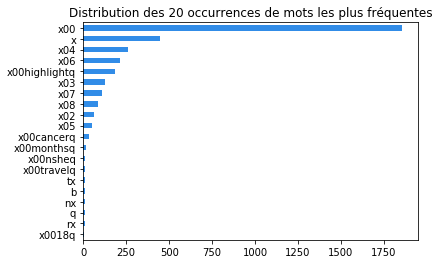

In [121]:
imp = ETL("E:\\Data\\RawData\\Exploit_data_texte\\Test")
imp.Lecture_Fichiers()

## Calcul des fréquences de mots pour chaque document

In [104]:
imp.retourner_calcul_frequence_mots()

Document n° 1 ----------------------
Fréquence de mots HighLight : -------
[('highlight', 4), ('nhe', 2), ('nnicholas', 1), ('levene', 1), ('must', 1), ('pay', 1), ('nominal', 1), ('sum', 1), ('bankrupt', 1), ('used', 1), ('money', 1), ('private', 1), ('jets', 1), ('super', 1), ('yachts', 1), ('xa3150', 1), ('year', 1), ('box', 1), ('ascot', 1), ('host', 1), ('xa310', 1), ('day', 1), ('pheasant', 1), ('shoots', 1), ('nthe', 1), ('city', 1), ('trader', 1), ('spent', 1), ('xa3588', 1), ('son', 1), ('bar', 1), ('mitzvah', 1), ('hiring', 1), ('girl', 1), ('band', 1), ('saturday', 1), ('tricked', 1), ('britain', 1), ('successful', 1), ('businessmen', 1), ('including', 1), ('stagecoach', 1), ('boss', 1), ('sir', 1), ('brian', 1), ('souter', 1)]
Fréquence de mots Article : -------
[('xe2', 12), ('x80', 12), ('levene', 10), ('pay', 7), ('xa31', 5), ('year', 5), ('x99s', 5), ('conned', 4), ('court', 4), ('nominal', 4), ('fraud', 4), ('xa0', 4), ('x99', 4), ('nlevene', 4), ('city', 3), ('investo

## Fréquence globale des mots pour les documents de type HighLights

In [55]:
imp.creation_Dictionnaire_HighLight_Frequence_Mots()

{'1': 2,
 '10': 2,
 '12': 1,
 '14': 1,
 '18': 1,
 '1970s': 1,
 '1973': 1,
 '1995': 1,
 '1996': 1,
 '20': 1,
 '2001': 1,
 '2004': 2,
 '2013': 1,
 '27': 2,
 '29': 1,
 '3': 1,
 '30': 1,
 '43': 1,
 '5': 1,
 '50': 1,
 '60': 1,
 '62': 1,
 '73': 1,
 '777': 1,
 '9': 1,
 '99': 2,
 'able': 1,
 'accident': 1,
 'action': 1,
 'activities': 1,
 'actor': 1,
 'addiction': 1,
 'address': 1,
 'addresses': 1,
 'advances': 2,
 'adventure': 1,
 'africa': 1,
 'age': 1,
 'aged': 1,
 'airborne': 1,
 'almost': 1,
 'alongside': 1,
 'also': 2,
 'alveolar': 1,
 'anonymously': 1,
 'app': 1,
 'approached': 1,
 'argued': 1,
 'arm': 1,
 'artists': 1,
 'ascot': 1,
 'aston': 1,
 'attachment': 1,
 'attacked': 1,
 'autobiography': 1,
 'award': 1,
 'away': 1,
 'b': 1,
 'babies': 1,
 'baby': 2,
 'back': 2,
 'band': 1,
 'bang': 1,
 'bankrupt': 1,
 'bar': 1,
 'beat': 1,
 'beats': 1,
 'believe': 1,
 'believed': 1,
 'benefit': 1,
 'bennett': 1,
 'bialik': 1,
 'bid': 2,
 'biofeedback': 1,
 'birth': 1,
 'bishop': 1,
 'bitten': 1

## Fréquence globale des mots pour les documents de type Articles

In [56]:
imp.creation_Dictionnaire_Article_Frequence_Mots()

{'xe2': 180,
 'x80': 187,
 'levene': 10,
 'pay': 14,
 'xa31': 6,
 'year': 42,
 'x99s': 48,
 'conned': 4,
 'court': 7,
 'nominal': 4,
 'fraud': 4,
 'xa0': 79,
 'x99': 54,
 'nlevene': 4,
 'city': 5,
 'investors': 3,
 'jailed': 5,
 'last': 24,
 'november': 4,
 'admitted': 4,
 'scheme': 5,
 'nhe': 23,
 'money': 20,
 'pictured': 27,
 'days': 14,
 'nthe': 90,
 'successful': 4,
 'nbut': 16,
 'lost': 12,
 'clients': 3,
 'assets': 3,
 'would': 30,
 'could': 18,
 'group': 9,
 'file': 3,
 'picture': 4,
 'trader': 2,
 'wealthy': 2,
 'yesterday': 4,
 'ordered': 2,
 'back': 20,
 '13': 9,
 'years': 27,
 'lucrative': 3,
 'ponzi': 2,
 'xa3316million': 2,
 'used': 7,
 'finance': 2,
 'lifestyle': 2,
 'private': 5,
 'jets': 2,
 'super': 2,
 'yachts': 2,
 'round': 5,
 'world': 9,
 'trips': 4,
 'sum': 2,
 'bankrupt': 2,
 'seven': 8,
 'found': 33,
 'britain': 21,
 'businessmen': 2,
 'interest': 6,
 'profits': 4,
 'believed': 4,
 'xa3101': 2,
 'told': 32,
 'order': 3,
 'nicknamed': 2,
 'beano': 2,
 'love': 6,

## Matrices TF_IDF pour chaque document

In [82]:
imp.retourner_calcul_matrice_idf()

Document n° 1 ----------------------
Matrice TF-IDF HighLight : -------
  (0, 12)	1.0
  (1, 22)	1.0
  (2, 17)	1.0
  (3, 20)	1.0
  (4, 25)	1.0
  (5, 23)	1.0
  (6, 36)	1.0
  (7, 2)	1.0
  (8, 12)	1.0
  (9, 21)	1.0
  (10, 40)	1.0
  (11, 19)	1.0
  (12, 27)	1.0
  (13, 16)	1.0
  (14, 37)	1.0
  (15, 44)	1.0
  (16, 42)	1.0
  (17, 45)	1.0
  (18, 5)	1.0
  (19, 0)	1.0
  (20, 14)	1.0
  (21, 41)	1.0
  (22, 10)	1.0
  (23, 26)	1.0
  (24, 29)	1.0
  (25, 12)	1.0
  (26, 24)	1.0
  (27, 9)	1.0
  (28, 38)	1.0
  (29, 33)	1.0
  (30, 43)	1.0
  (31, 31)	1.0
  (32, 3)	1.0
  (33, 18)	1.0
  (34, 13)	1.0
  (35, 11)	1.0
  (36, 1)	1.0
  (37, 28)	1.0
  (38, 12)	1.0
  (39, 21)	1.0
  (40, 39)	1.0
  (41, 7)	1.0
  (42, 35)	1.0
  (43, 8)	1.0
  (44, 15)	1.0
  (45, 34)	1.0
  (46, 4)	1.0
  (47, 30)	1.0
  (48, 6)	1.0
  (49, 32)	1.0
Matrice TF-IDF Article : -------
  (0, 26)	1.0
  (1, 177)	1.0
  (2, 324)	1.0
  (3, 176)	1.0
  (4, 55)	1.0
  (5, 316)	1.0
  (6, 64)	1.0
  (7, 169)	1.0
  (8, 254)	1.0
  (9, 325)	1.0
  (10, 138)	1.0
  

  (0, 26)	1.0
  (1, 195)	1.0
  (2, 17)	1.0
  (3, 202)	1.0
  (4, 307)	1.0
  (5, 2)	1.0
  (6, 5)	1.0
  (7, 238)	1.0
  (8, 7)	1.0
  (9, 75)	1.0
  (10, 4)	1.0
  (11, 214)	1.0
  (12, 77)	1.0
  (13, 220)	1.0
  (14, 162)	1.0
  (15, 271)	1.0
  (16, 6)	1.0
  (17, 149)	1.0
  (18, 0)	1.0
  (19, 336)	1.0
  (20, 191)	1.0
  (21, 77)	1.0
  (22, 220)	1.0
  (23, 149)	1.0
  (24, 0)	1.0
  :	:
  (559, 101)	1.0
  (560, 262)	1.0
  (561, 196)	1.0
  (562, 114)	1.0
  (563, 275)	1.0
  (564, 125)	1.0
  (565, 299)	1.0
  (566, 239)	1.0
  (567, 305)	1.0
  (568, 336)	1.0
  (569, 74)	1.0
  (570, 324)	1.0
  (571, 271)	1.0
  (572, 225)	1.0
  (573, 141)	1.0
  (574, 138)	1.0
  (575, 42)	1.0
  (576, 323)	1.0
  (577, 58)	1.0
  (578, 216)	1.0
  (579, 256)	1.0
  (580, 260)	1.0
  (581, 271)	1.0
  (582, 152)	1.0
  (583, 84)	1.0
-----------------------------------
Document n° 14 ----------------------
Matrice TF-IDF HighLight : -------
  (0, 18)	1.0
  (1, 23)	1.0
  (2, 28)	1.0
  (3, 13)	1.0
  (4, 16)	1.0
  (5, 6)	1.0
  (6, 14)	

  (3441, 118)	1.0
-----------------------------------
Document n° 25 ----------------------
Matrice TF-IDF HighLight : -------
[[1]]
Matrice TF-IDF Article : -------
  (0, 0)	1.0
  (1, 100)	1.0
  (2, 66)	1.0
  (3, 3)	1.0
  (4, 8)	1.0
  (5, 7)	1.0
  (6, 8)	1.0
  (7, 8)	1.0
  (8, 30)	1.0
  (9, 63)	1.0
  (10, 72)	1.0
  (11, 8)	1.0
  (12, 8)	1.0
  (13, 38)	1.0
  (14, 65)	1.0
  (15, 8)	1.0
  (16, 8)	1.0
  (17, 50)	1.0
  (18, 67)	1.0
  (19, 72)	1.0
  (20, 8)	1.0
  (21, 8)	1.0
  (22, 55)	1.0
  (23, 69)	1.0
  (24, 8)	1.0
  :	:
  (262, 60)	1.0
  (263, 4)	1.0
  (264, 8)	1.0
  (265, 8)	1.0
  (266, 35)	1.0
  (267, 76)	1.0
  (268, 8)	1.0
  (269, 8)	1.0
  (270, 51)	1.0
  (271, 7)	1.0
  (272, 70)	1.0
  (273, 8)	1.0
  (274, 8)	1.0
  (275, 31)	1.0
  (276, 7)	1.0
  (277, 70)	1.0
  (278, 8)	1.0
  (279, 8)	1.0
  (280, 62)	1.0
  (281, 7)	1.0
  (282, 66)	1.0
  (283, 8)	1.0
  (284, 8)	1.0
  (285, 23)	1.0
  (286, 1)	1.0
-----------------------------------
Document n° 26 ----------------------
Matrice TF-IDF H

## Calcul de la matrice TF-IDF globale pour les documents de type HighLights

In [119]:
print(imp.retourner_calcul_matrice_idf_global_Highlight())

  (0, 275)	0.155020238177
  (0, 387)	0.387550595442
  (0, 439)	0.113628903429
  (0, 333)	0.113628903429
  (0, 385)	0.113628903429
  (0, 498)	0.113628903429
  (0, 648)	0.125193307735
  (0, 441)	0.113628903429
  (0, 626)	0.113628903429
  (0, 78)	0.100968329154
  (0, 265)	0.0745116075272
  (0, 302)	0.0703421140724
  (0, 73)	0.113628903429
  (0, 421)	0.183971017502
  (0, 698)	0.113628903429
  (0, 374)	0.100968329154
  (0, 228)	0.0603984542225
  (0, 519)	0.113628903429
  (0, 309)	0.113628903429
  (0, 627)	0.113628903429
  (0, 755)	0.113628903429
  (0, 27)	0.140417179804
  (0, 753)	0.19012349177
  (0, 749)	0.113628903429
  (0, 0)	0.302904987462
  :	:
  (20, 181)	0.121267051785
  (20, 169)	0.121267051785
  (20, 413)	0.13647291415
  (20, 84)	0.13647291415
  (20, 285)	0.13647291415
  (20, 88)	0.13647291415
  (20, 214)	0.13647291415
  (20, 388)	0.13647291415
  (20, 369)	0.272945828299
  (20, 207)	0.13647291415
  (20, 638)	0.13647291415
  (20, 268)	0.13647291415
  (20, 531)	0.13647291415
  (20, 1

## Calcul de la matrice TF_IDF globale pour les documents de type Article

In [122]:
print(imp.retourner_calcul_matrice_idf_global_Article())

  (0, 357)	0.00691244687711
  (0, 565)	0.0534062035226
  (0, 2254)	0.0251547904737
  (0, 3976)	0.0251547904737
  (0, 2239)	0.269585428207
  (0, 2249)	0.0133708098473
  (0, 701)	0.0670561033602
  (0, 3790)	0.0503095809474
  (0, 4042)	0.0171589335673
  (0, 814)	0.100619161895
  (0, 2175)	0.0251547904737
  (0, 2680)	0.275932051533
  (0, 2928)	0.0223520344534
  (0, 1448)	0.0445051696021
  (0, 4002)	0.0503095809474
  (0, 1802)	0.0754643714211
  (0, 3982)	0.073906346707
  (0, 6017)	0.0407268948202
  (0, 2724)	0.0503095809474
  (0, 3757)	0.120112534971
  (0, 2809)	0.109004730425
  (0, 360)	0.0267416196945
  (0, 5885)	0.249164807645
  (0, 5800)	0.111760172267
  (0, 2504)	0.0251547904737
  :	:
  (26, 5389)	0.0129320890968
  (26, 4888)	0.0258641781936
  (26, 4282)	0.0129320890968
  (26, 4842)	0.0129320890968
  (26, 5432)	0.0129320890968
  (26, 5428)	0.0258641781936
  (26, 4551)	0.0129320890968
  (26, 5525)	0.0129320890968
  (26, 4979)	0.014553663663
  (26, 5267)	0.014553663663
  (26, 4482)	0.014

## Test de l'enregistrement de documents

In [14]:
imp.enregistrerListeFichiers()

## Test du chargement du texte de documents

In [15]:
imp.Charger_Document(2)

------------------------------
ARTICLE N° 2 
------------------------------
['b', 'nhelen', 'pow', 'npublished', 'n09', '16', 'est', '29', 'may', '2013', 'nupdated', 'n10', '51', 'est', '29', 'may', '2013', 'nmiami', 'heat', 'superstar', 'lebron', 'james', 'gave', 'touching', 'tribute', 'one', 'biggest', 'fans', 'last', 'night', 'wearing', 'name', 'sneakers', 'hours', 'lost', 'grueling', 'six', 'year', 'battle', 'cancer', 'nbella', 'rodriguez', 'torres', '10', 'loved', 'nothing', 'watching', 'heat', 'play', 'basketball', 'family', 'passed', 'away', 'yesterday', 'fighting', 'disease', 'half', 'young', 'life', 'nbella', 'diagnosed', 'aggressive', 'form', 'cancer', 'age', 'four', 'astounded', 'doctors', 'recovered', 'illness', 'something', 'parents', 'deemed', 'miracle', 'nbut', 'last', 'year', 'tumors', 'returned', 'despite', 'putting', 'another', 'fierce', 'fight', 'condition', 'deteriorated', 'slipped', 'away', 'peacefully', 'surrounded', 'family', 'friends', 'nscroll', 'video', 'nbrav